In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [2]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [3]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdata.isna().head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,False,False,False,False,False,False,False
2010-02-01,False,False,False,False,False,False,False
2010-03-01,False,False,False,False,False,False,False
2010-04-01,False,False,False,False,False,False,False
2010-05-01,False,False,False,False,False,False,False


In [5]:
dfdata.dropna(inplace = True)

In [6]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-08-01,34809.0,15821.0,17690.0,9185.0,10035.0,9716.0,97256.0
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0


In [7]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [8]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [9]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [10]:
td = dfdata['Honda'].resample('MS').mean()

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


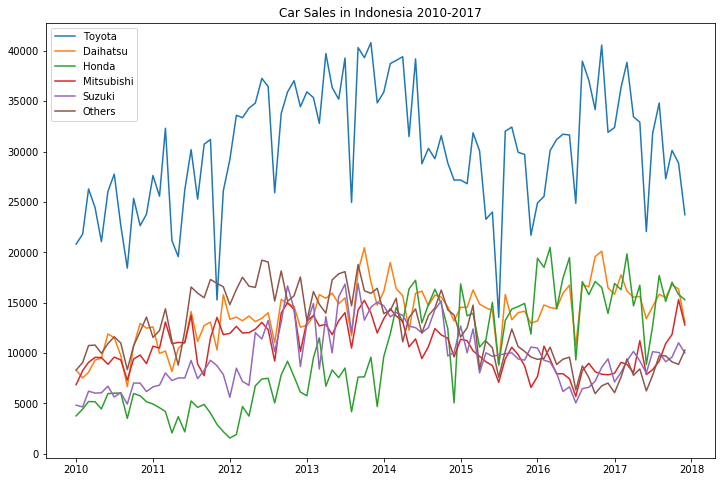

In [11]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

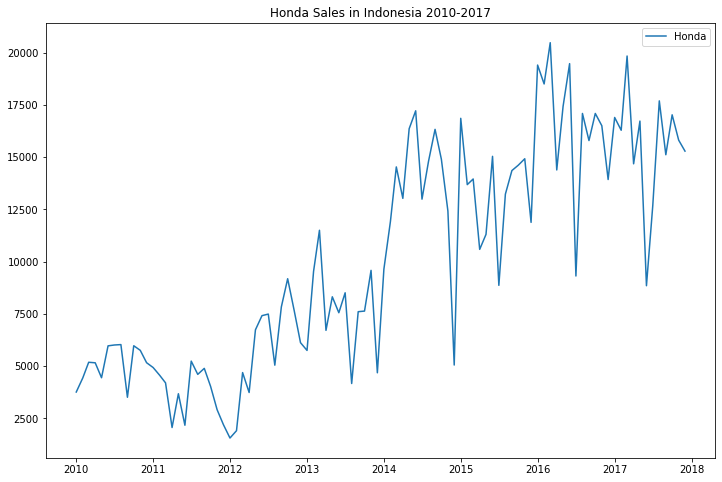

In [12]:
plt.figure(figsize = (12,8))
plt.title('Honda Sales in Indonesia 2010-2017')
plt.plot(tdata['Honda'], label = 'Honda')
plt.legend()
plt.show()

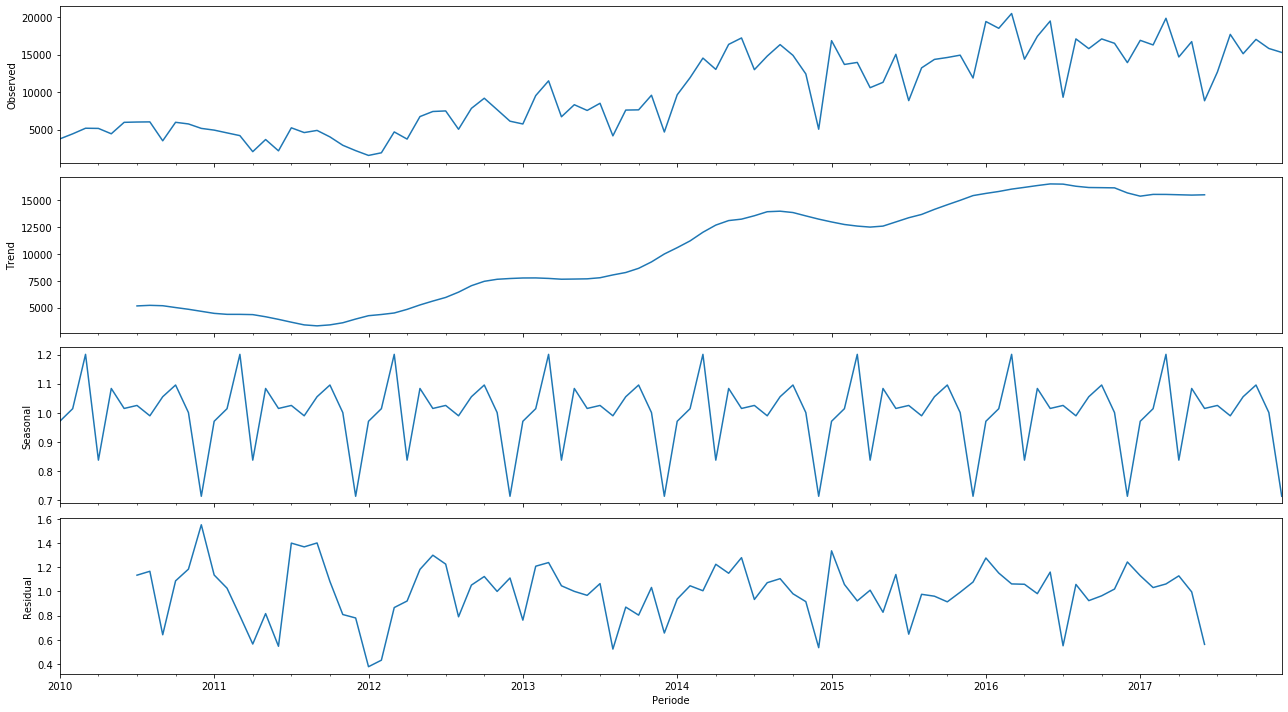

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='multipicative')
fig = decomposition.plot()
plt.show()

In [14]:
decomposition.seasonal.head(10)

Periode
2010-01-01    0.970747
2010-02-01    1.014024
2010-03-01    1.200715
2010-04-01    0.837269
2010-05-01    1.083498
2010-06-01    1.014806
2010-07-01    1.025163
2010-08-01    0.989602
2010-09-01    1.055108
2010-10-01    1.095329
Freq: MS, Name: Honda, dtype: float64

In [15]:
decomposition.resid.head(10)

Periode
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01    1.135339
2010-08-01    1.167600
2010-09-01    0.641293
2010-10-01    1.088251
Freq: MS, Name: Honda, dtype: float64

Made per DataFrame

In [16]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [19]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( danta < o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

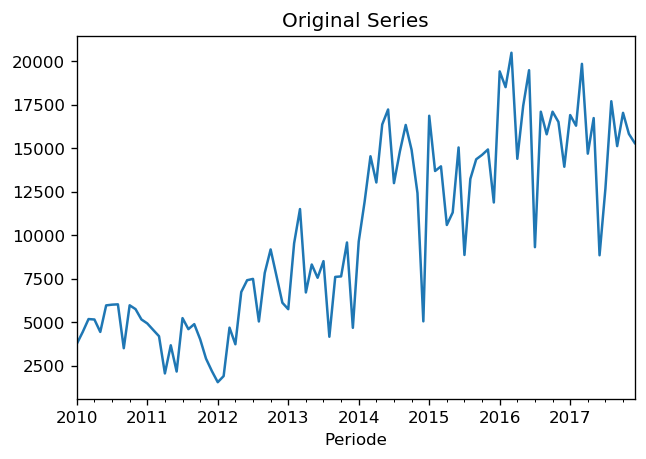

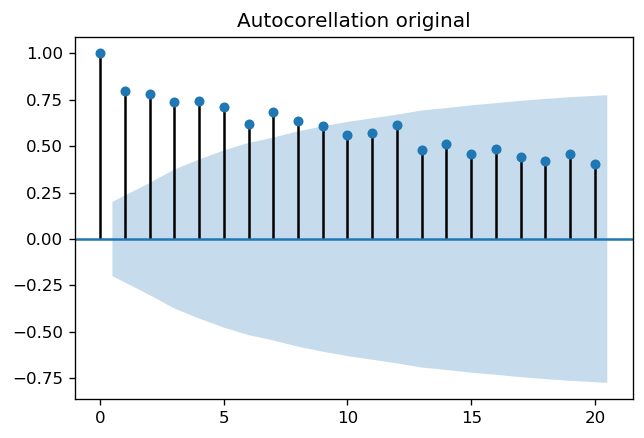

In [21]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dfhonda.plot()
ori.set_title('Original Series')
plot_acf(dfhonda, title = 'Autocorellation original')

plt.show()

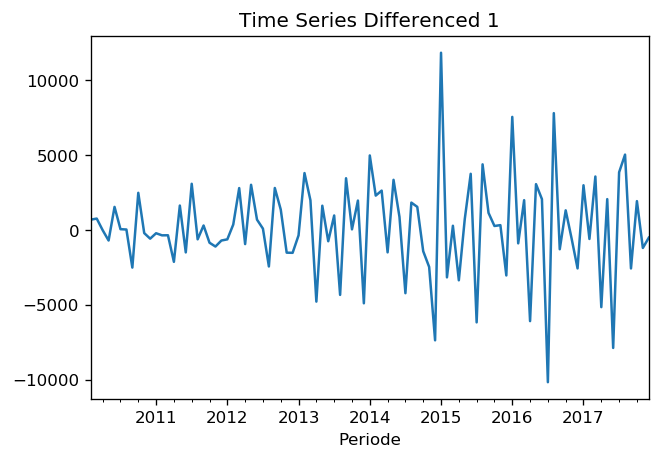

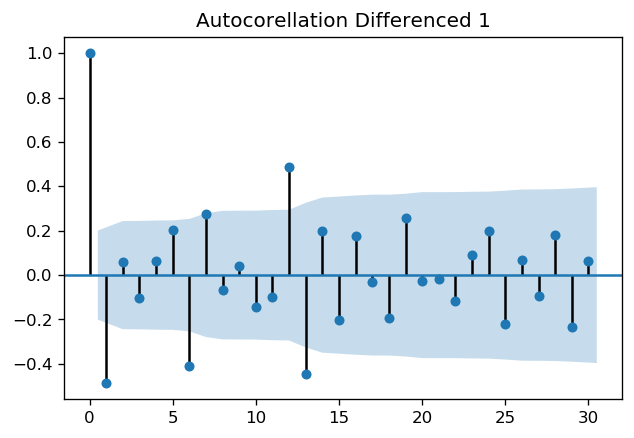

ADF Statistic:-2.922979024260021
p-value: 0.042740361927415274


In [22]:
# Differencing 1
diff1 = dfhonda.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dfhonda.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()

#Dif  1
result = adfuller(dfhonda.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

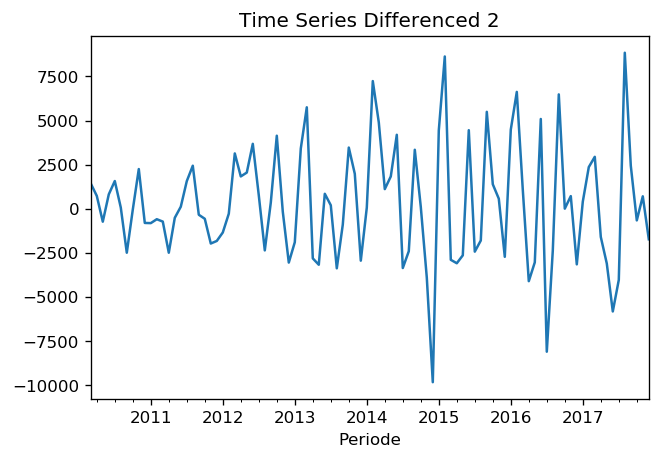

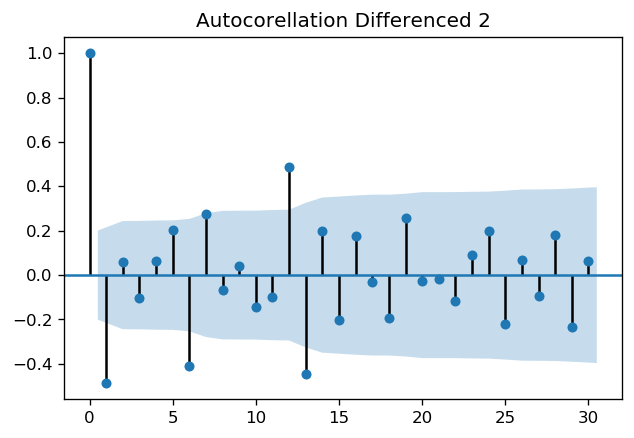

ADF Statistic:-3.2513321715800854
p-value: 0.01719911992400672


In [23]:
# Differencing 
diff13 = dfhonda.diff(2).dropna().plot()
diff13.set_title('Time Series Differenced 2')
plot_acf(dfhonda.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 2')
plt.show()

#Dif 2
result = adfuller(dfhonda.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [24]:
result = adfuller(dfhonda.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 1
result = adfuller(dfhonda.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 2
result = adfuller(dfhonda.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049


ADF Statistic:-2.922979024260021
p-value: 0.042740361927415274


ADF Statistic:-3.2513321715800854
p-value: 0.01719911992400672


Data yang akan di gunakan ada lah data Dif-1, karena setelah di dif-1 sudah semakin mendekati, pada Dif-2 tinggi p-value semakin kecil namun cukup menggunakan Dif-1 karena Dif 2 berarti semakin banyak NaN

In [25]:
h_difference_1 = dfhonda.diff().dropna()

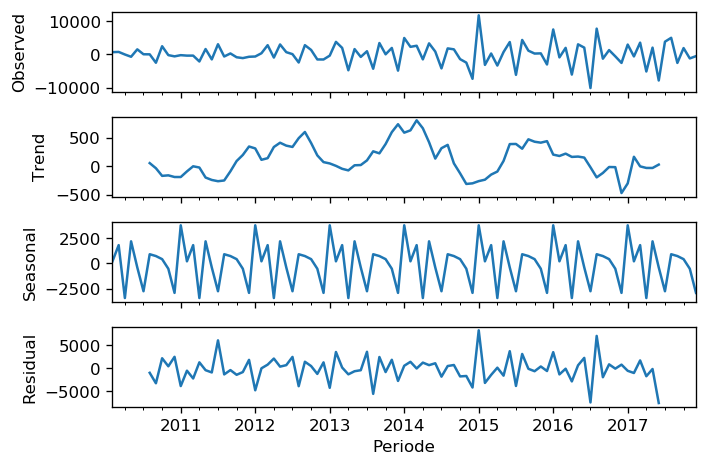

In [26]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
h_decomposition_difference_1 = sm.tsa.seasonal_decompose(h_difference_1, model='additive') 
fig = h_decomposition_difference_1.plot()
plt.show()

In [27]:
h_deseason = h_difference_1/ h_decomposition_difference_1.seasonal

In [28]:
h_decomposition_difference_1.seasonal.tail()

Periode
2017-08-01     911.538690
2017-09-01     730.508929
2017-10-01     423.086310
2017-11-01    -529.782738
2017-12-01   -2928.794643
Name: Honda, dtype: float64

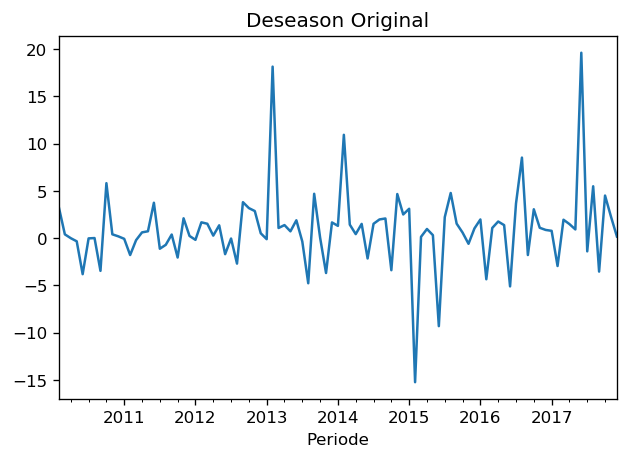

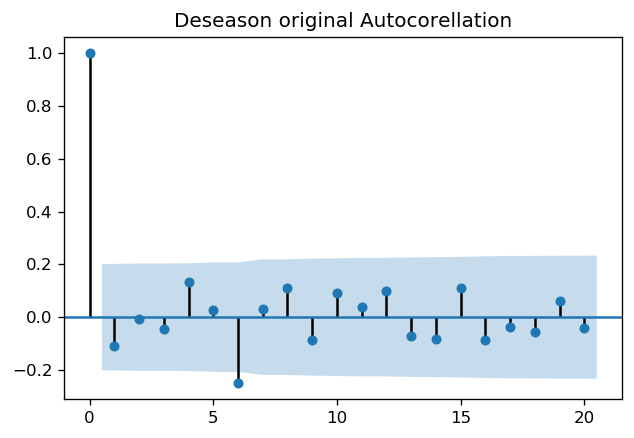

In [29]:
#Deseason original
h_ori_deseason = h_deseason.plot()
h_ori_deseason.set_title('Deseason Original')
plot_acf(h_deseason, title = 'Deseason original Autocorellation')

plt.show()

In [30]:
result = adfuller(h_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-10.739238786181984
p-value: 2.8461925873322606e-19


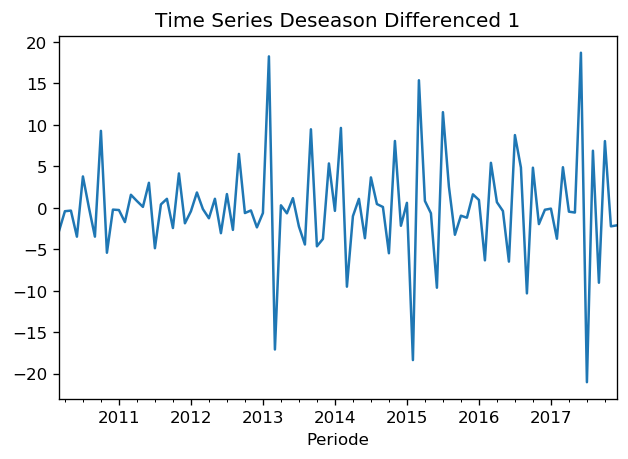

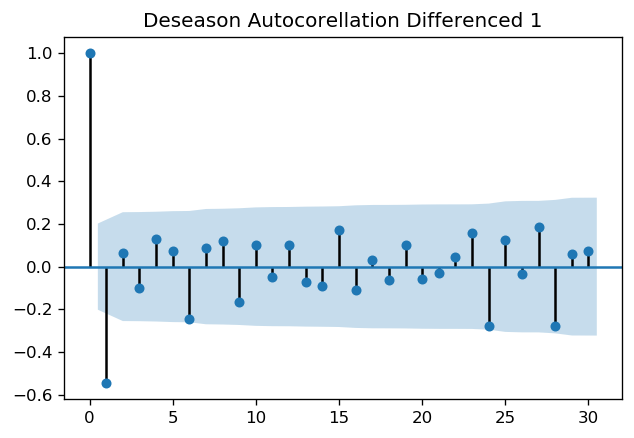

In [31]:
# 1st Differencing
diff1_deseason = h_deseason.diff().dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(h_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

In [32]:
result = adfuller(h_deseason.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-5.736150114183567
p-value: 6.431513177389244e-07


C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


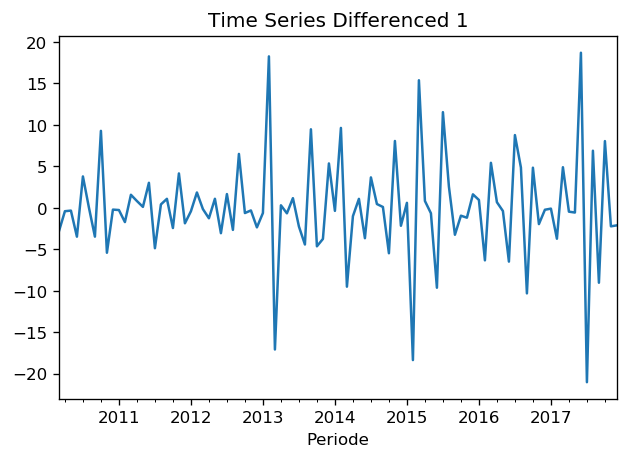

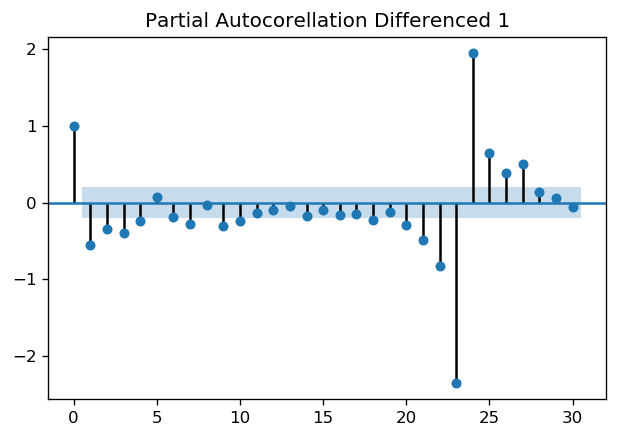

In [33]:
#PACF
diff1 = h_deseason.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(h_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

## ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(h_deseason,order =(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Honda   No. Observations:                   94
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -268.795
Method:                       css-mle   S.D. of innovations              4.117
Date:                Wed, 20 Nov 2019   AIC                            545.590
Time:                        07:02:14   BIC                            555.763
Sample:                    03-01-2010   HQIC                           549.700
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0149      0.014      1.075      0.285      -0.012       0.042
ar.L1.D.Honda    -0.1135      0.103     -1.106      0.272      -0.315       0.088
ma.L1.D.Honda    -1.0000      0.035    -

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


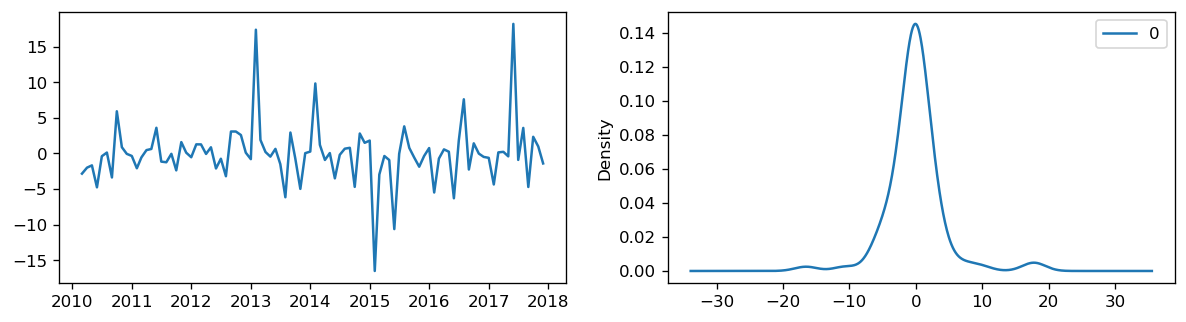

In [35]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])


plt.show()

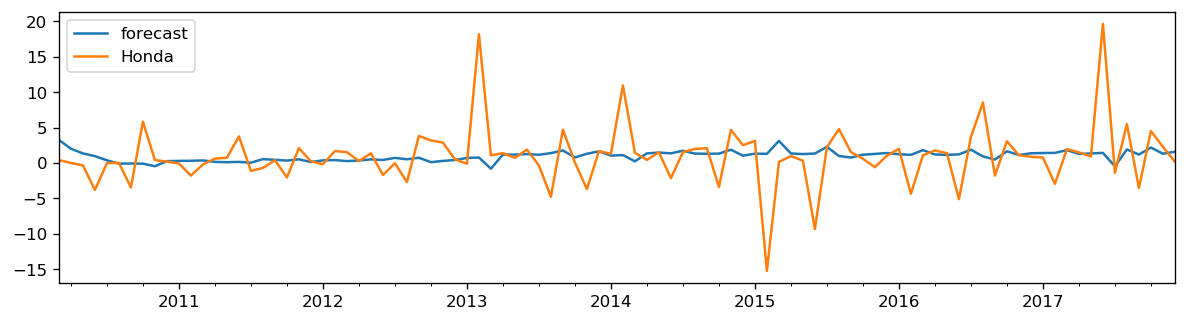

In [36]:
model_fit.plot_predict(dynamic=False)
plt.show()

Validation

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


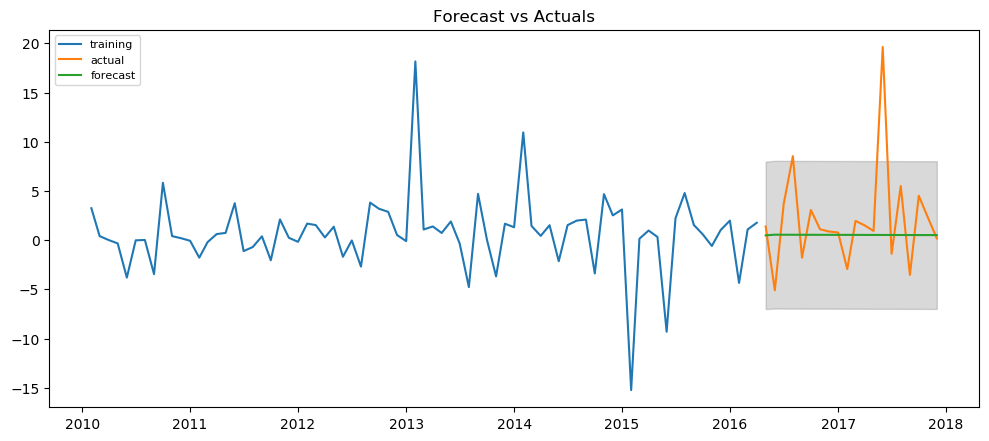

In [37]:
train = h_deseason[:75]
test = h_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.8900790906517113,
 'corr': -0.07967864417287966,
 'minmax': 2.133508296689472}

In [39]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(h_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Fit ARIMA: order=(1, 0, 1); AIC=546.591, BIC=556.807, Fit time=0.084 seconds
Fit ARIMA: order=(0, 0, 0); AIC=543.818, BIC=548.926, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=544.647, BIC=552.309, Fit time=0.022 seconds
Fit ARIMA: order=(0, 0, 1); AIC=544.605, BIC=552.266, Fit time=0.021 seconds
Total fit time: 0.135 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   95
Model:                     ARMA(0, 0)   Log Likelihood                -269.909
Method:                           css   S.D. of innovations              4.146
Date:                Wed, 20 Nov 2019   AIC                            543.818
Time:                        07:02:16   BIC                            548.926
Sample:                             0   HQIC                           545.882
                                                                              
                 coef    std e

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## SARIMA (Seasonal ARIMA)

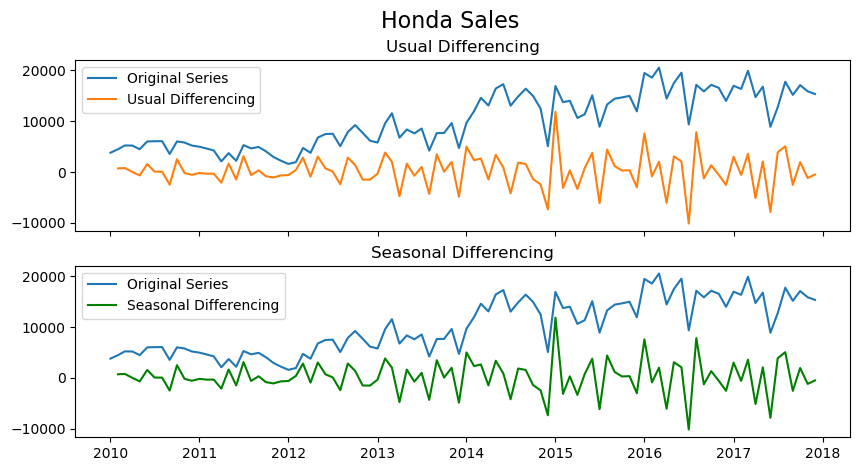

In [40]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfhonda, label='Original Series')
axes[0].plot(dfhonda.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dfhonda, label='Original Series')
axes[1].plot(dfhonda.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Honda Sales', fontsize=16)
plt.show()

In [41]:
import pmdarima as pm
model = pm.auto_arima(dfhonda, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1579.389, BIC=1584.227, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1562.518, BIC=1572.194, Fit time=0.519 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1554.885, BIC=1564.561, Fit time=0.746 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1554.465, BIC=1566.559, Fit time=1.465 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1558.624, BIC=1568.300, Fit time=0.875 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1557.614, BIC=1572.127, Fit time=4.244 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1566.257, BIC=1573.514, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1557.817, BIC=1574.749, Fit time=5.097 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1556.016, BIC=1570.529, Fit time=1.867 seconds
Fit ARIMA: order=(0, 1, 0) s

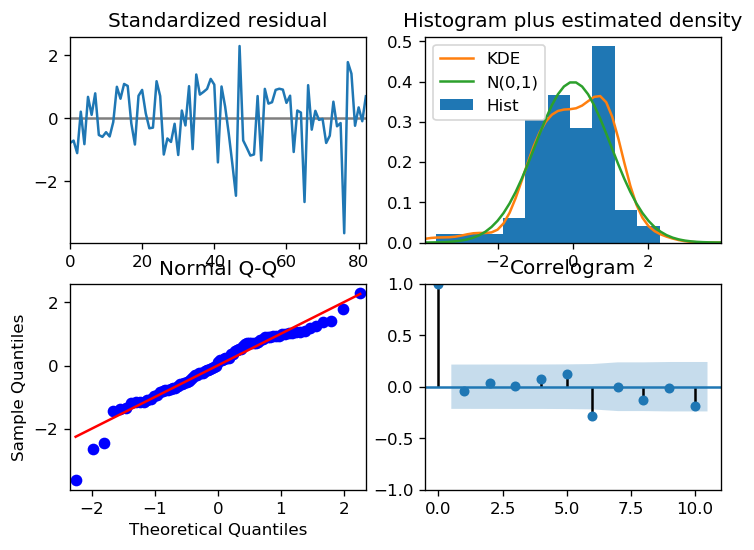

In [42]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

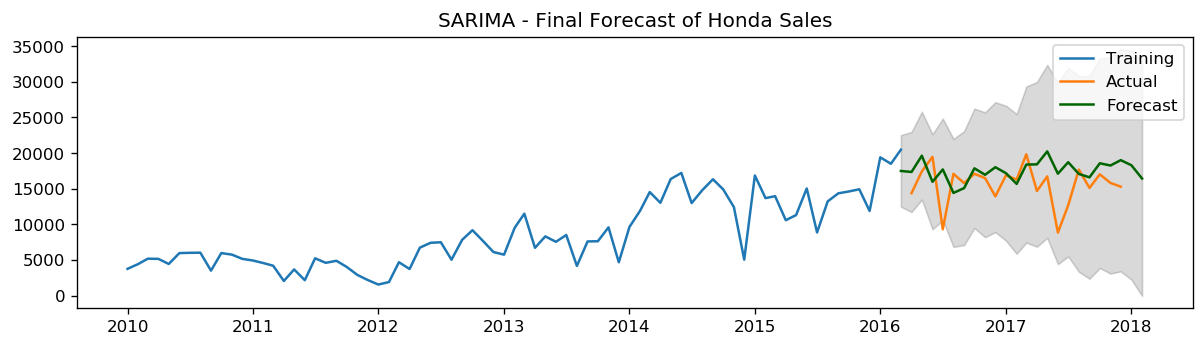

In [43]:
n_periods = 24
train = dfhonda[:75]
test = dfhonda[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Honda Sales")
plt.show()

In [44]:
# forecast_accuracy(fc, test)

## SARIMAX

In [45]:
result_mul = sm.tsa.seasonal_decompose(dfhonda[-24:],   # 24 last months
                                model='multiplicative', 
                                extrapolate_trend='freq')

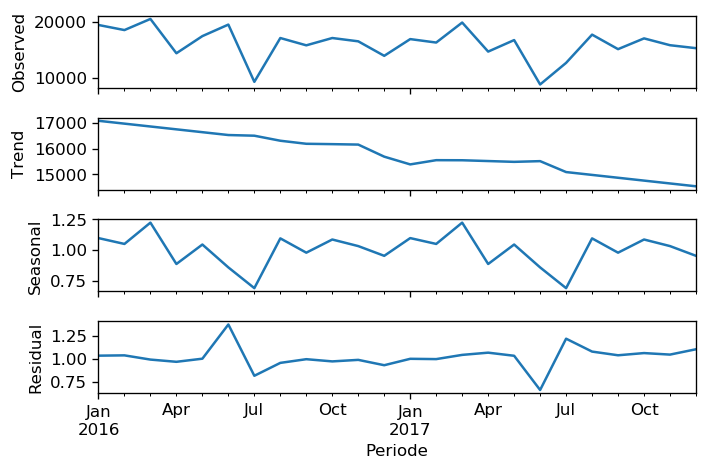

In [46]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [47]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [48]:
dfhonda = pd.DataFrame(dfhonda)
dfhonda['month'] = dfhonda.index.month
dfH = pd.merge(dfhonda, seasonal_index, how='left', on='month')
dfH.columns = ['Honda_sales_value_average', 'month', 'seasonal_index']
dfH.index = dfhonda.index  # reassign the index.

In [49]:
dfH.head()

,Honda_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,3755.0,1,1.097804
2010-02-01,4431.0,2,1.050209
2010-03-01,5179.0,3,1.223717
2010-04-01,5154.0,4,0.886854
2010-05-01,4439.0,5,1.045383


In [50]:

smaxmodel = pm.auto_arima(dfH[['Honda_sales_value_average']], exogenous=dfH[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1569.772, BIC=1584.357, Fit time=0.863 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1622.852, BIC=1630.144, Fit time=0.028 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1578.698, BIC=1590.853, Fit time=1.016 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1580.926, BIC=1593.080, Fit time=0.854 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1568.576, BIC=1585.591, Fit time=1.264 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=1574.936, BIC=1589.521, Fit time=0.362 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1570.480, BIC=1589.926, Fit time=4.517 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1582.331, BIC=1594.485, Fit time=0.176 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 12); AIC=1567.432, BIC=1589.310, Fit time=5.234 seconds
Fit ARIMA: order=(0, 0, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 1, 2, 12)   Log Likelihood                -774.716
Date:                            Wed, 20 Nov 2019   AIC                           1567.432
Time:                                    07:03:32   BIC                           1589.310
Sample:                                         0   HQIC                          1576.227
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    504.6136    480.512      1.050      0.294    -437.173    1446.400
x1            -0.4420   4153.148     -0.000      1.000   -8140.463    8139.579
ar.L1          0.7672      0.148      5.167      0.000       0.476       1.058
ma.L1         -0.4229      0.180     -2.353      0.019      -0.775      -0.071
ar.S.L12      -0.5532      0.489     -1.131      0.258      -1.511       0.405
ar.S.L24       0.4380      0.135      3.250      0.001       0.174       0.702
ma.S.L12      -0.0407      2.450     -0.017      0.987      -4.843       4.761
ma.S.L24      -0.9278      0.391     -2.370      0.018      -1.695      -0.161
sigma2      4.797e+06      0.138   3.49e+07      0.000     4.8e+06     4.8e+06
===================================================================================
Ljung-Box (Q):                       63.86   Jarque-Bera (JB):                11.06
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.55
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.23e+24. Standard errors may be unstable.
"""

In [51]:
seasonal_index

,Honda,month
Periode,,
2017-01-01,1.097804,1
2017-02-01,1.050209,2
2017-03-01,1.223717,3
2017-04-01,0.886854,4
2017-05-01,1.045383,5
2017-06-01,0.859028,6
2017-07-01,0.690145,7
2017-08-01,1.095533,8
2017-09-01,0.979045,9


SARIMAX done..
forcast next 24month

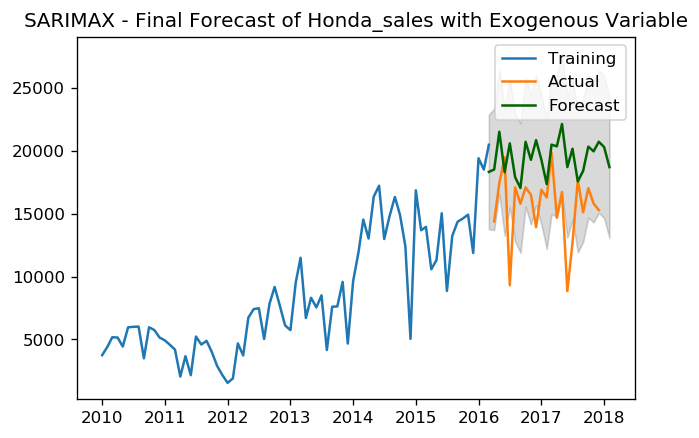

In [52]:
train = dfH[:75]
test = dfH[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Honda'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Honda_sales_value_average'], label ='Training')
plt.plot(test['Honda_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Honda_sales with Exogenous Variable")
plt.show()

## Prophet

In [53]:
test = dfhonda.copy()

In [54]:
test.drop('month', axis = 1, inplace = True)

In [55]:
test.reset_index(inplace=True)

In [56]:
prediction_size = 7
train_df = test[:-prediction_size]

In [57]:
from fbprophet import Prophet 
m = Prophet()

In [58]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,3755.0
1,2010-02-01,4431.0
2,2010-03-01,5179.0
3,2010-04-01,5154.0
4,2010-05-01,4439.0


In [59]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,2028.393949,-830.815109,5094.391947,2028.393949,2028.393949,39.174868,39.174868,39.174868,39.174868,39.174868,39.174868,0.0,0.0,0.0,2067.568817
1,2010-02-01,2208.819468,-436.942217,5847.751868,2208.819468,2208.819468,526.617684,526.617684,526.617684,526.617684,526.617684,526.617684,0.0,0.0,0.0,2735.437152
2,2010-03-01,2371.784454,1238.061103,7445.643741,2371.784454,2371.784454,1875.185770,1875.185770,1875.185770,1875.185770,1875.185770,1875.185770,0.0,0.0,0.0,4246.970223
3,2010-04-01,2552.209973,-1634.358335,4399.339979,2552.209973,2552.209973,-1012.617216,-1012.617216,-1012.617216,-1012.617216,-1012.617216,-1012.617216,0.0,0.0,0.0,1539.592757
4,2010-05-01,2726.815314,163.096542,6150.177899,2726.815314,2726.815314,300.425841,300.425841,300.425841,300.425841,300.425841,300.425841,0.0,0.0,0.0,3027.241155


In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,2028.393949,-830.815109,5094.391947,2028.393949,2028.393949,39.174868,39.174868,39.174868,39.174868,39.174868,39.174868,0.0,0.0,0.0,2067.568817
1,2010-02-01,2208.819468,-436.942217,5847.751868,2208.819468,2208.819468,526.617684,526.617684,526.617684,526.617684,526.617684,526.617684,0.0,0.0,0.0,2735.437152
2,2010-03-01,2371.784454,1238.061103,7445.643741,2371.784454,2371.784454,1875.185770,1875.185770,1875.185770,1875.185770,1875.185770,1875.185770,0.0,0.0,0.0,4246.970223
3,2010-04-01,2552.209973,-1634.358335,4399.339979,2552.209973,2552.209973,-1012.617216,-1012.617216,-1012.617216,-1012.617216,-1012.617216,-1012.617216,0.0,0.0,0.0,1539.592757
4,2010-05-01,2726.815314,163.096542,6150.177899,2726.815314,2726.815314,300.425841,300.425841,300.425841,300.425841,300.425841,300.425841,0.0,0.0,0.0,3027.241155
5,2010-06-01,2907.240834,976.940929,7062.805592,2907.240834,2907.240834,1201.410583,1201.410583,1201.410583,1201.410583,1201.410583,1201.410583,0.0,0.0,0.0,4108.651417
6,2010-07-01,3081.846175,-987.278799,5168.030812,3081.846175,3081.846175,-955.520003,-955.520003,-955.520003,-955.520003,-955.520003,-955.520003,0.0,0.0,0.0,2126.326172
7,2010-08-01,3262.271694,-55.858325,6125.122303,3262.271694,3262.271694,-199.785914,-199.785914,-199.785914,-199.785914,-199.785914,-199.785914,0.0,0.0,0.0,3062.485781
8,2010-09-01,3442.697214,856.761701,6884.241535,3442.697214,3442.697214,266.914200,266.914200,266.914200,266.914200,266.914200,266.914200,0.0,0.0,0.0,3709.611414
9,2010-10-01,3617.302555,928.905475,7018.386319,3617.302555,3617.302555,346.054097,346.054097,346.054097,346.054097,346.054097,346.054097,0.0,0.0,0.0,3963.356652


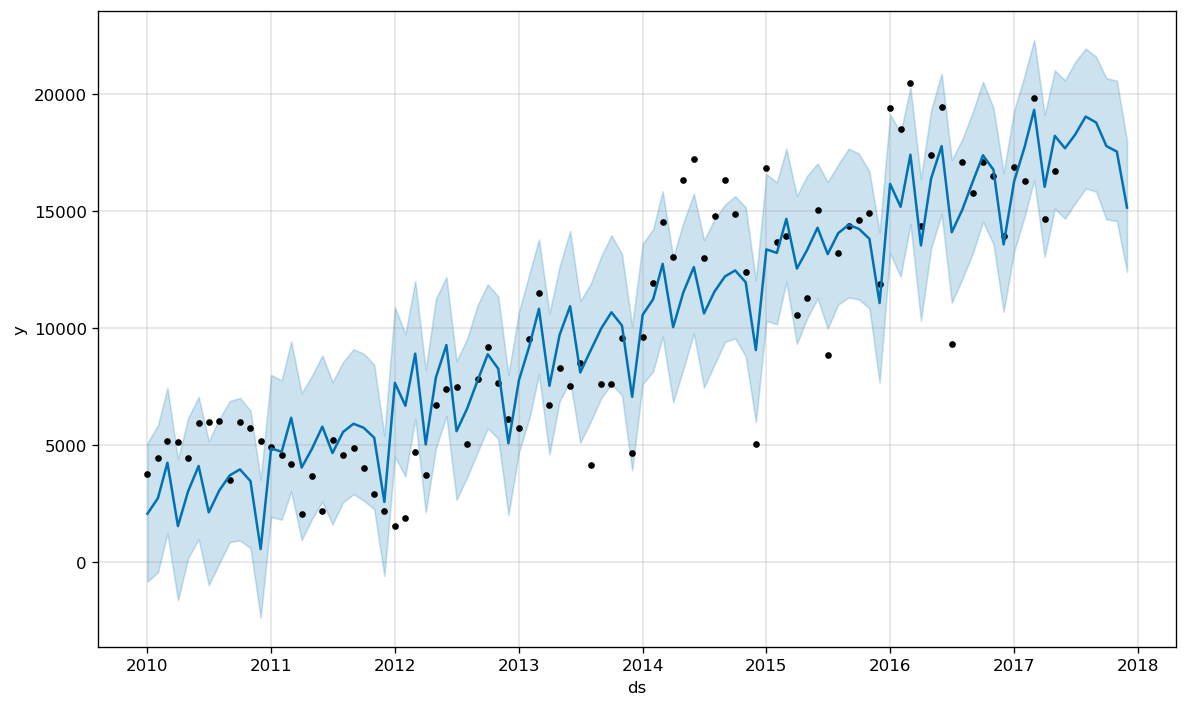

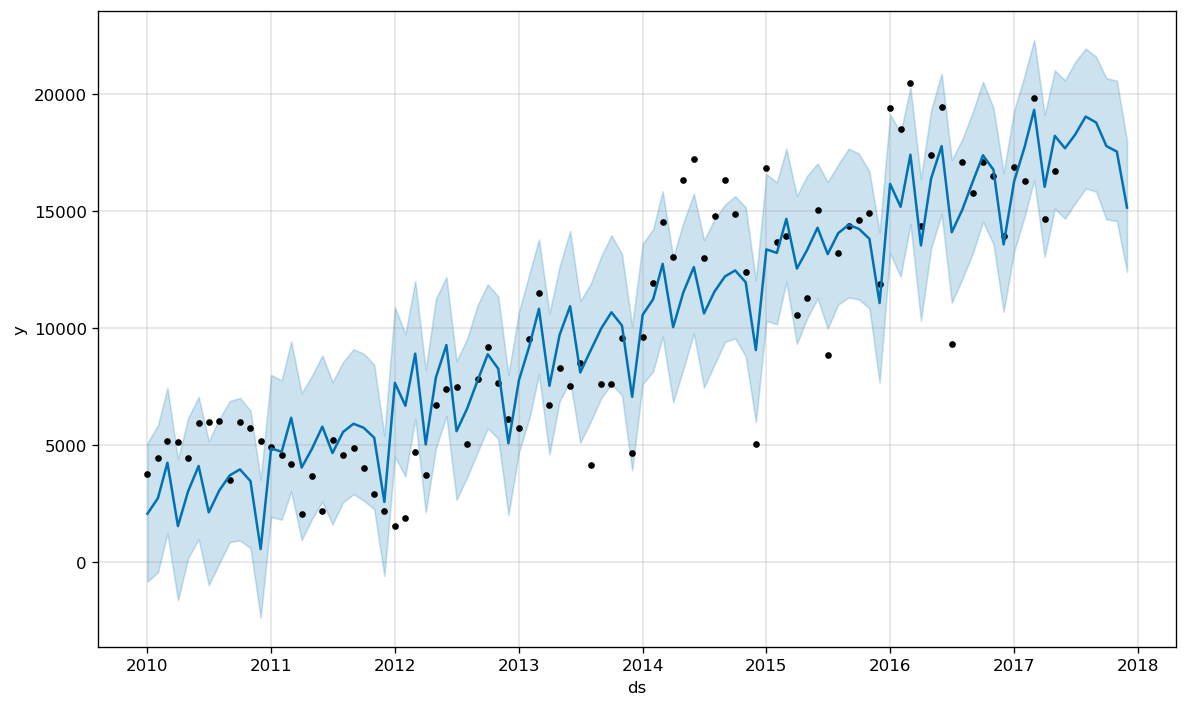

In [62]:
m.plot(forecast)

In [63]:
test.head()

,Periode,Honda
0,2010-01-01,3755.0
1,2010-02-01,4431.0
2,2010-03-01,5179.0
3,2010-04-01,5154.0
4,2010-05-01,4439.0


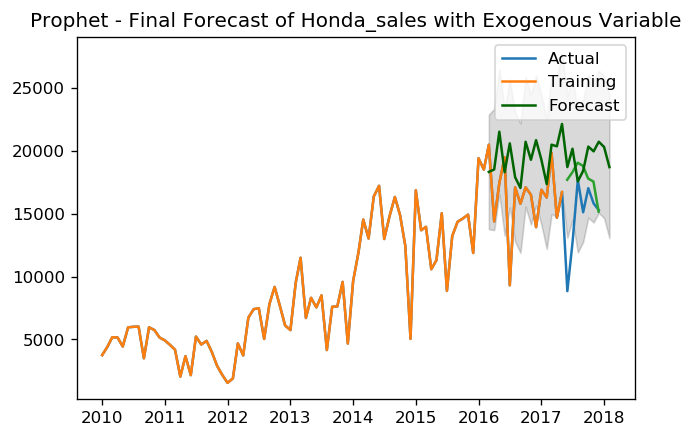

In [64]:
plt.plot(test['Periode'],test['Honda'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Honda_sales with Exogenous Variable")
plt.show()

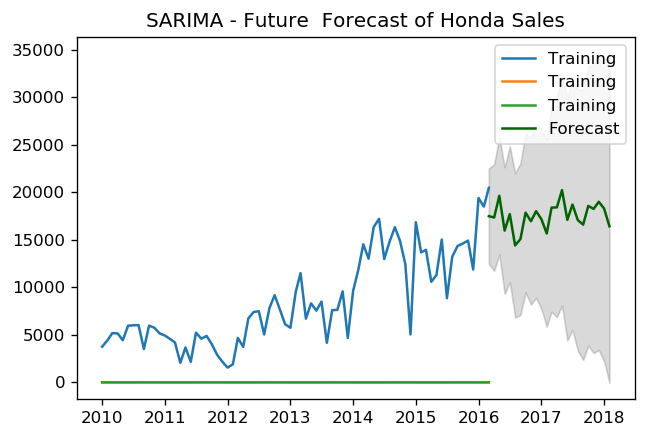

In [65]:
training=dfhonda
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Honda Sales")
plt.show()

In [66]:
mitsubishi_predict=pd.DataFrame(fitted_series)
mitsubishi_predict.columns=['honda']

In [67]:
mitsubishi_predict.to_csv('honda_predict.csv')